In [10]:
from keras.datasets import imdb
(train_data, train_labels),(test_data, test_labels) = imdb.load_data( num_words=10000)

In [11]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [12]:
train_labels[0:20]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1])

In [13]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results


In [14]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [15]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [16]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
from keras import optimizers
"""
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
"""



"\nmodel.compile(optimizer=optimizers.RMSprop(lr=0.001),\n              loss='binary_crossentropy',\n              metrics=['accuracy'])\n"

In [18]:
from keras import losses
from keras import metrics
"""
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])
"""

'\nmodel.compile(optimizer=optimizers.RMSprop(lr=0.001),\n              loss=losses.binary_crossentropy,\n              metrics=[metrics.binary_accuracy])\n'

In [19]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [20]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - acc: 0.6619 - loss: 0.6298 - val_acc: 0.8636 - val_loss: 0.4449
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - acc: 0.8851 - loss: 0.3894 - val_acc: 0.8465 - val_loss: 0.3780
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - acc: 0.9184 - loss: 0.2770 - val_acc: 0.8883 - val_loss: 0.2944
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - acc: 0.9294 - loss: 0.2228 - val_acc: 0.8850 - val_loss: 0.2883
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - acc: 0.9453 - loss: 0.1790 - val_acc: 0.8879 - val_loss: 0.2741
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - acc: 0.9508 - loss: 0.1561 - val_acc: 0.8860 - val_loss: 0.2795
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - acc: 0.9607 - loss: 0.1328 - val_acc: 0.8841 - val_loss: 0.2902
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - acc: 0.9672 - loss: 0.1150 - val_acc: 0.8824 - val_loss: 0.3022
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - acc: 0.9725

In [21]:
history_dict = history.history
history_dict.keys()


dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])

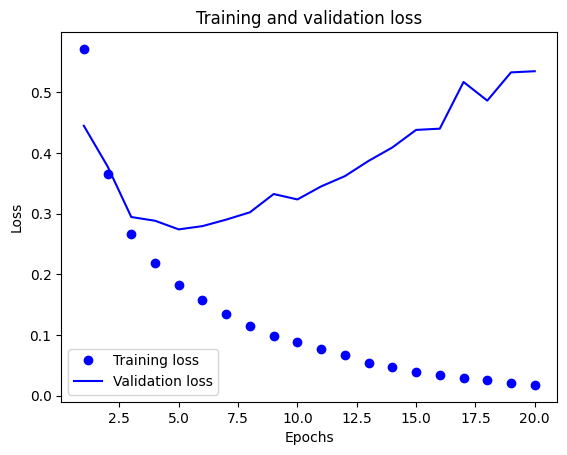

In [22]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - acc: 0.6931 - loss: 0.5921 - val_acc: 0.8647 - val_loss: 0.4004
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - acc: 0.8916 - loss: 0.3499 - val_acc: 0.8808 - val_loss: 0.3278
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - acc: 0.9157 - loss: 0.2694 - val_acc: 0.8793 - val_loss: 0.3071
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - acc: 0.9331 - loss: 0.2210 - val_acc: 0.8891 - val_loss: 0.2846
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - acc: 0.9414 - loss: 0.1945 - val_acc: 0.8886 - val_loss: 0.2784
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - acc: 0.9465 - loss: 0.1709 - val_acc: 0.8830 - val_loss: 0.2891
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - acc: 0.9543 - loss: 0.1550 - val_acc: 0.8857 - val_loss: 0.2849
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - acc: 0.9609 - loss: 0.1382 - val_acc: 0.8840 - val_loss: 0.2845
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - acc: 0.9626

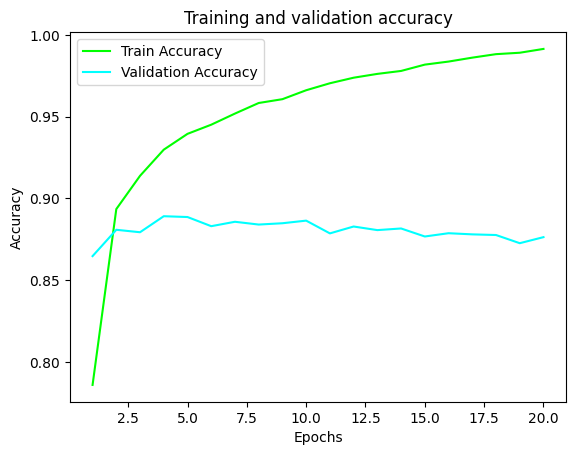

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.8629 - loss: 0.4074
Training Accuracy: 0.9914000034332275
Validation Accuracy: 0.8762999773025513
Test accuracy: 0.8664


In [28]:
# One Hidden Layer
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
val_accuracy_values = history_dict['val_acc']
acc_values = history_dict['acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'lime', label='Train Accuracy ')
plt.plot(epochs, val_accuracy_values, 'cyan', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

train_accuracy = history.history['acc'][-1]
val_accuracy = history.history['val_acc'][-1]
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")
print(f"Test accuracy: {test_accuracy:.4f}")

With a single hidden layer I would suscpect underfitting to occur since there is not enough complexity in the model so it will not be able to make accurate predictions on the test set since it cant properly fit the data it is trained on. However based on the graph it actually apears that overfitting occurs since the train accuracy is very high but the test accuracy is much lower. Therefore, with 1 hidden layer, the model is overly complex for the data which results in a lower test score.

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - acc: 0.6942 - loss: 0.6224 - val_acc: 0.8657 - val_loss: 0.4096
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - acc: 0.8837 - loss: 0.3577 - val_acc: 0.8652 - val_loss: 0.3279
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - acc: 0.9164 - loss: 0.2436 - val_acc: 0.8675 - val_loss: 0.3237
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - acc: 0.9413 - loss: 0.1833 - val_acc: 0.8882 - val_loss: 0.2790
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - acc: 0.9534 - loss: 0.1458 - val_acc: 0.8655 - val_loss: 0.3533
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - acc: 0.9580 - loss: 0.1290 - val_acc: 0.8846 - val_loss: 0.3005
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - acc: 0.9705 - loss: 0.0967 - val_acc: 0.8763 - val_loss: 0.3288
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - acc: 0.9759 - loss: 0.0846 - val_acc: 0.8696 - val_loss: 0.3863
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - acc: 0.9790

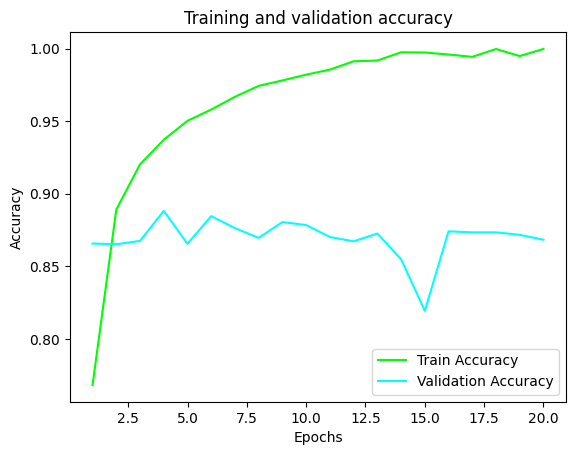

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.8567 - loss: 0.7349
Training Accuracy: 0.9998000264167786
Validation Accuracy: 0.8683000206947327
Test accuracy: 0.8580


In [29]:
# 3 Hidden Layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
val_accuracy_values = history_dict['val_acc']
acc_values = history_dict['acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'lime', label='Train Accuracy ')
plt.plot(epochs, val_accuracy_values, 'cyan', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

train_accuracy = history.history['acc'][-1]
val_accuracy = history.history['val_acc'][-1]
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")
print(f"Test accuracy: {test_accuracy:.4f}")

Similarly, this model demonstrates overfitting even more so. The test accuracy is slightly lower than with 1 hidden layer although it could be margin of error. This makes sense since if 1 hidden layer of 16 neurons was too complex, clearly 3 hidden layers of 16 neurons will also overfit since it is added complexity.

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - acc: 0.6978 - loss: 0.5839 - val_acc: 0.8732 - val_loss: 0.3639
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - acc: 0.8921 - loss: 0.3184 - val_acc: 0.8816 - val_loss: 0.3047
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - acc: 0.9159 - loss: 0.2368 - val_acc: 0.8853 - val_loss: 0.2868
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - acc: 0.9374 - loss: 0.1829 - val_acc: 0.8844 - val_loss: 0.2893
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - acc: 0.9555 - loss: 0.1403 - val_acc: 0.8895 - val_loss: 0.2881
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - acc: 0.9629 - loss: 0.1153 - val_acc: 0.8846 - val_loss: 0.3106
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - acc: 0.9720 - loss: 0.0989 - val_acc: 0.8801 - val_loss: 0.3220
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - acc: 0.9735 - loss: 0.0860 - val_acc: 0.8831 - val_loss: 0.3350
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - acc: 0.9809

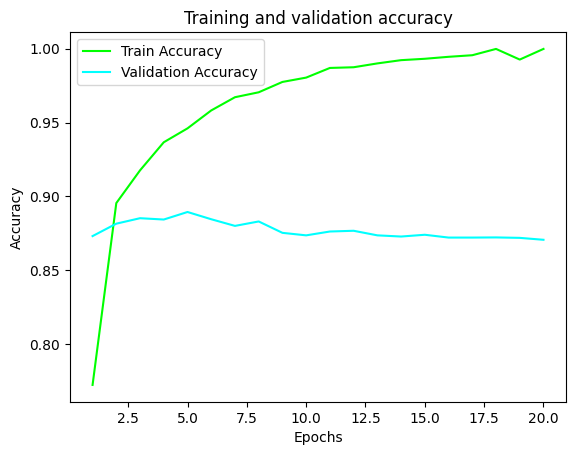

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.8567 - loss: 0.6477
Training Accuracy: 0.9998000264167786
Validation Accuracy: 0.8707000017166138
Test accuracy: 0.8597


In [30]:
# 32 hidden units
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
val_accuracy_values = history_dict['val_acc']
acc_values = history_dict['acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'lime', label='Train Accuracy ')
plt.plot(epochs, val_accuracy_values, 'cyan', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

train_accuracy = history.history['acc'][-1]
val_accuracy = history.history['val_acc'][-1]
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")
print(f"Test accuracy: {test_accuracy:.4f}")

32 neurons per layer instead of 16 also leads to overfitting as the training accuracy is much higher than validation accuracy and per each epoch validation accuracy trends down, showing that each epoch the data is being fit too closely.

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - acc: 0.6608 - loss: 0.5948 - val_acc: 0.8110 - val_loss: 0.4273
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - acc: 0.8794 - loss: 0.3139 - val_acc: 0.8833 - val_loss: 0.2941
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - acc: 0.9181 - loss: 0.2243 - val_acc: 0.8800 - val_loss: 0.2947
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - acc: 0.9331 - loss: 0.1822 - val_acc: 0.8870 - val_loss: 0.2817
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - acc: 0.9510 - loss: 0.1439 - val_acc: 0.8752 - val_loss: 0.3154
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - acc: 0.9643 - loss: 0.1119 - val_acc: 0.8756 - val_loss: 0.3403
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - acc: 0.9747 - loss: 0.0830 - val_acc: 0.8809 - val_loss: 0.3237
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - acc: 0.9805 - loss: 0.0685 - val_acc: 0.8682 - val_loss: 0.3875
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - acc: 0.985

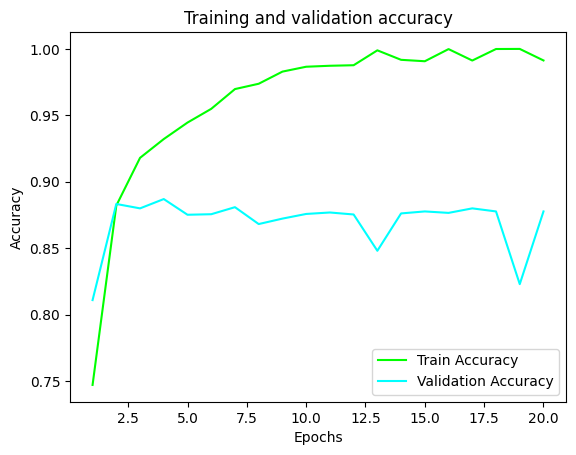

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.8618 - loss: 0.6609
Training Accuracy: 0.991266667842865
Validation Accuracy: 0.8776999711990356
Test accuracy: 0.8651


In [31]:
# 64 hidden units
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
val_accuracy_values = history_dict['val_acc']
acc_values = history_dict['acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'lime', label='Train Accuracy ')
plt.plot(epochs, val_accuracy_values, 'cyan', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

train_accuracy = history.history['acc'][-1]
val_accuracy = history.history['val_acc'][-1]
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")
print(f"Test accuracy: {test_accuracy:.4f}")

64 neurons per layer also results in overfitting for similar reasons as the previous examples.

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 159ms/step - acc: 0.6511 - loss: 0.6009 - val_acc: 0.8750 - val_loss: 0.3273
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - acc: 0.8750 - loss: 0.3115 - val_acc: 0.8888 - val_loss: 0.2827
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - acc: 0.9242 - loss: 0.2167 - val_acc: 0.8891 - val_loss: 0.2708
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - acc: 0.9378 - loss: 0.1698 - val_acc: 0.8838 - val_loss: 0.2908
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 145ms/step - acc: 0.9509 - loss: 0.1342 - val_acc: 0.8831 - val_loss: 0.3173
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - acc: 0.9583 - loss: 0.1122 - val_acc: 0.8844 - val_loss: 0.3050
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - acc: 0.9829 - loss: 0.0629 - val_acc: 0.8566 - val_loss: 0.4315
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - acc: 0.9708 - loss: 0.0792 - val_acc: 0.8827 - val_loss: 0.3400
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - acc: 

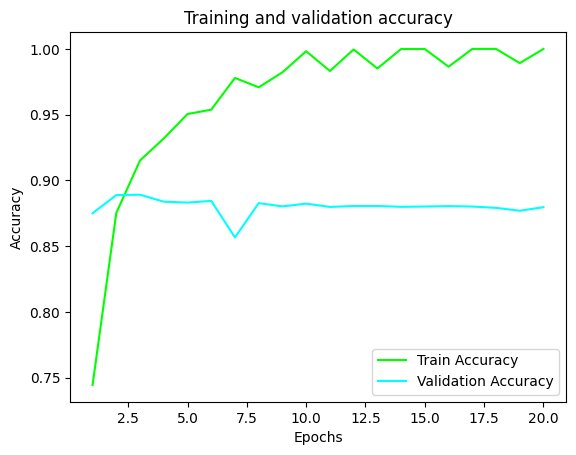

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - acc: 0.8654 - loss: 0.6352
Training Accuracy: 1.0
Validation Accuracy: 0.8795999884605408
Test accuracy: 0.8693


In [32]:
# 128 hidden units
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
val_accuracy_values = history_dict['val_acc']
acc_values = history_dict['acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'lime', label='Train Accuracy ')
plt.plot(epochs, val_accuracy_values, 'cyan', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

train_accuracy = history.history['acc'][-1]
val_accuracy = history.history['val_acc'][-1]
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")
print(f"Test accuracy: {test_accuracy:.4f}")

128 hidden neurons containues the trend established by the previous examples.

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - acc: 0.5570 - loss: 0.6837 - val_acc: 0.8017 - val_loss: 0.6267
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - acc: 0.7724 - loss: 0.5999 - val_acc: 0.8141 - val_loss: 0.5351
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - acc: 0.8496 - loss: 0.5049 - val_acc: 0.8472 - val_loss: 0.4497
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - acc: 0.8944 - loss: 0.4006 - val_acc: 0.8799 - val_loss: 0.3741
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - acc: 0.9158 - loss: 0.3191 - val_acc: 0.8830 - val_loss: 0.3286
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - acc: 0.9305 - loss: 0.2582 - val_acc: 0.8872 - val_loss: 0.3006
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - acc: 0.9387 - loss: 0.2167 - val_acc: 0.8861 - val_loss: 0.2911
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - acc: 0.9446 - loss: 0.1860 - val_acc: 0.8870 - val_loss: 0.2803
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - acc: 0.9534

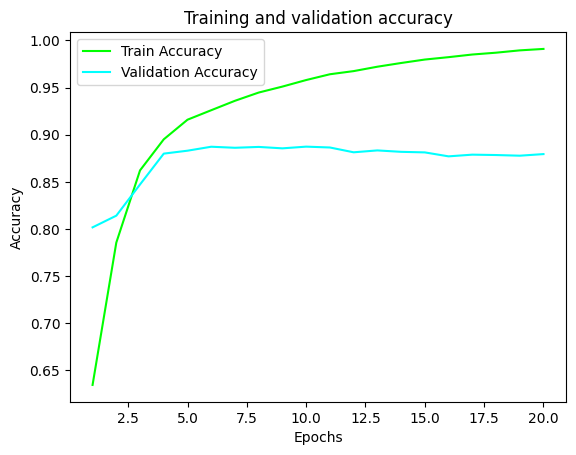

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.8615 - loss: 0.4527
Training Accuracy: 0.990933358669281
Validation Accuracy: 0.8794000148773193
Test accuracy: 0.8655


In [33]:
# 8 hidden units
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
val_accuracy_values = history_dict['val_acc']
acc_values = history_dict['acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'lime', label='Train Accuracy ')
plt.plot(epochs, val_accuracy_values, 'cyan', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

train_accuracy = history.history['acc'][-1]
val_accuracy = history.history['val_acc'][-1]
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")
print(f"Test accuracy: {test_accuracy:.4f}")

Going the opposite direction reducing to 8 neurons also results in overfitting but it can be seen in the graph it takes longer for the train accuracy to apporoach its peak value when compared to the previous and for validation accuracy to decrease. However with the amount of epochs it does trend to be overfitting.

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - acc: 0.7022 - loss: 0.6300 - val_acc: 0.8270 - val_loss: 0.5093
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - acc: 0.8692 - loss: 0.4600 - val_acc: 0.8651 - val_loss: 0.4130
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - acc: 0.8932 - loss: 0.3697 - val_acc: 0.8779 - val_loss: 0.3543
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - acc: 0.9082 - loss: 0.3039 - val_acc: 0.8851 - val_loss: 0.3188
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - acc: 0.9244 - loss: 0.2554 - val_acc: 0.8861 - val_loss: 0.2986
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - acc: 0.9263 - loss: 0.2265 - val_acc: 0.8889 - val_loss: 0.2847
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - acc: 0.9388 - loss: 0.1956 - val_acc: 0.8894 - val_loss: 0.2797
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - acc: 0.9445 - loss: 0.1770 - val_acc: 0.8893 - val_loss: 0.2754
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - acc: 0.9532

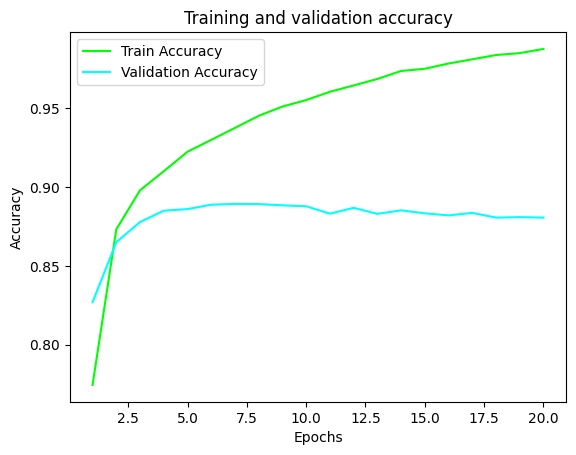

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.8637 - loss: 0.3952
Training Accuracy: 0.9878000020980835
Validation Accuracy: 0.8806999921798706
Test accuracy: 0.8683


In [34]:
# 4 hidden units
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
val_accuracy_values = history_dict['val_acc']
acc_values = history_dict['acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'lime', label='Train Accuracy ')
plt.plot(epochs, val_accuracy_values, 'cyan', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

train_accuracy = history.history['acc'][-1]
val_accuracy = history.history['val_acc'][-1]
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")
print(f"Test accuracy: {test_accuracy:.4f}")

With 4 neurons the train accuracy climb is even slower but stil by the end result in overfitting.

Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - acc: 0.5487 - loss: 0.6851 - val_acc: 0.6234 - val_loss: 0.6645
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.6356 - loss: 0.6548 - val_acc: 0.6712 - val_loss: 0.6397
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.6871 - loss: 0.6265 - val_acc: 0.6935 - val_loss: 0.6162


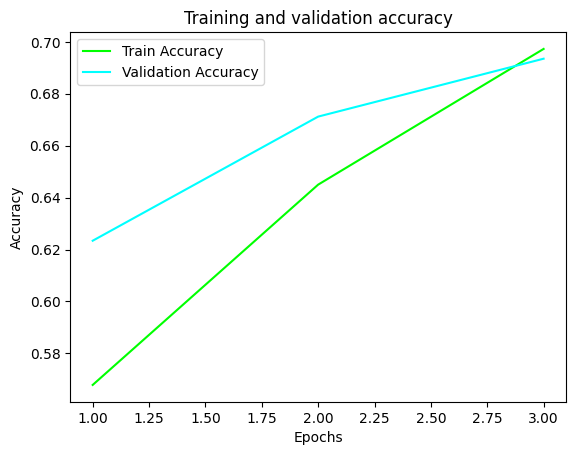

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.6823 - loss: 0.6151
Training Accuracy: 0.6972666382789612
Validation Accuracy: 0.6934999823570251
Test accuracy: 0.6799


In [40]:
# 1 neurons
model = models.Sequential()
model.add(layers.Dense(1, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=3,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
val_accuracy_values = history_dict['val_acc']
acc_values = history_dict['acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'lime', label='Train Accuracy ')
plt.plot(epochs, val_accuracy_values, 'cyan', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

train_accuracy = history.history['acc'][-1]
val_accuracy = history.history['val_acc'][-1]
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")
print(f"Test accuracy: {test_accuracy:.4f}")

In order to demonstrate underfitting only 1 layer is used and 4 epohcs to make sure underfitting will occur. The model is too simple and cannot fully represent the train data. This is shown by the training accuracy being lower than the validation accuracy.

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - acc: 0.6917 - loss: 0.2193 - val_acc: 0.8537 - val_loss: 0.1433
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - acc: 0.8766 - loss: 0.1240 - val_acc: 0.8685 - val_loss: 0.1110
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - acc: 0.8974 - loss: 0.0917 - val_acc: 0.8844 - val_loss: 0.0942
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - acc: 0.9218 - loss: 0.0726 - val_acc: 0.8872 - val_loss: 0.0878
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - acc: 0.9320 - loss: 0.0621 - val_acc: 0.8874 - val_loss: 0.0858
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - acc: 0.9433 - loss: 0.0532 - val_acc: 0.8865 - val_loss: 0.0862
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - acc: 0.9484 - loss: 0.0492 - val_acc: 0.8835 - val_loss: 0.0851
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - acc: 0.9538 - loss: 0.0437 - val_acc: 0.8845 - val_loss: 0.0833
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - acc: 0.9636

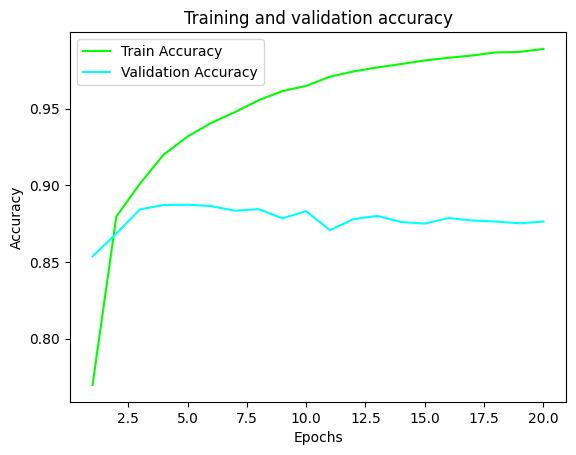

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.8596 - loss: 0.1066
Training Accuracy: 0.9890000224113464
Validation Accuracy: 0.8763999938964844
Test accuracy: 0.8648


In [35]:
# mse loss function
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mean_squared_error',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
val_accuracy_values = history_dict['val_acc']
acc_values = history_dict['acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'lime', label='Train Accuracy ')
plt.plot(epochs, val_accuracy_values, 'cyan', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

train_accuracy = history.history['acc'][-1]
val_accuracy = history.history['val_acc'][-1]
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")
print(f"Test accuracy: {test_accuracy:.4f}")

Changing the loss function to mse does not drastically effect the results compared to the base 2 hidden layer 16 neurons cross entropy loss function. To me this shows that the loss function is not as significant when compared to amount of hidden layers and neurons per layer. Cross-entropy is typically used for multi class classification while mse more common for regression problems.

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - acc: 0.7098 - loss: 0.5872 - val_acc: 0.8521 - val_loss: 0.3992
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - acc: 0.8975 - loss: 0.3347 - val_acc: 0.8843 - val_loss: 0.3088
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - acc: 0.9218 - loss: 0.2396 - val_acc: 0.8871 - val_loss: 0.2800
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - acc: 0.9437 - loss: 0.1786 - val_acc: 0.8792 - val_loss: 0.2988
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - acc: 0.9571 - loss: 0.1401 - val_acc: 0.8777 - val_loss: 0.3099
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - acc: 0.9662 - loss: 0.1147 - val_acc: 0.8750 - val_loss: 0.3165
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - acc: 0.9746 - loss: 0.0918 - val_acc: 0.8763 - val_loss: 0.3450
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - acc: 0.9793 - loss: 0.0759 - val_acc: 0.8765 - val_loss: 0.3572
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - acc: 0.9852

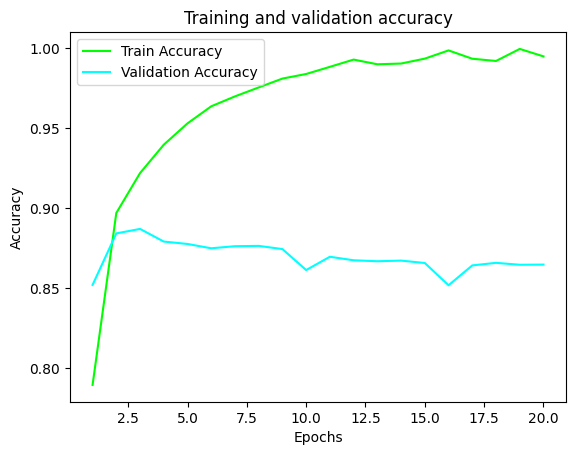

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.8506 - loss: 0.7507
Training Accuracy: 0.9949333071708679
Validation Accuracy: 0.864799976348877
Test accuracy: 0.8536


In [36]:
# tanh activation
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
val_accuracy_values = history_dict['val_acc']
acc_values = history_dict['acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'lime', label='Train Accuracy ')
plt.plot(epochs, val_accuracy_values, 'cyan', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

train_accuracy = history.history['acc'][-1]
val_accuracy = history.history['val_acc'][-1]
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")
print(f"Test accuracy: {test_accuracy:.4f}")

Using tanh activiation seems to result in slighly lower performance than relu but it can be margin of error. The difference between tanh and relu is that tanh maps values between -1 and 1 while relu maps to - to 0 and keeps postive values. This means that relu positive values will have a stronger influence on the neuron while in tanh negative and postive values have similar effects. Depending on the dataset can effect which activation function to choose. However there are other factors such as hidden layers and neurons will have a greater impact on model accuracy but this is still good to know and test for more refined model tuning.

# Part 2

In [51]:
import tensorflow as tf
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [52]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

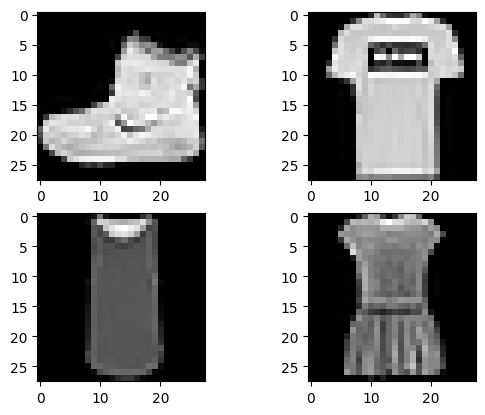

In [53]:
seed = 7
np.random.seed(seed)
plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
plt.show()

In [54]:
num_pixels = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape(x_train.shape[0], num_pixels).astype('float32')
x_test = x_test.reshape(x_test.shape[0], num_pixels).astype('float32')

# normalize inputs from 0-255 to 0-1
x_train = x_train / 255
x_test = x_test / 255

# one hot encode outputs (0000000001, 0000000010, 0000000100 ...)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [55]:
num_classes = y_test.shape[1]

def baseline_model():
# create model
 model = Sequential()
 model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
 model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
# Compile model
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model


# build the model
model = baseline_model()
# Fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
300/300 - 8s - 25ms/step - accuracy: 0.8227 - loss: 0.5090 - val_accuracy: 0.8429 - val_loss: 0.4354
Epoch 2/10
300/300 - 13s - 43ms/step - accuracy: 0.8687 - loss: 0.3707 - val_accuracy: 0.8645 - val_loss: 0.3907
Epoch 3/10
300/300 - 5s - 17ms/step - accuracy: 0.8830 - loss: 0.3282 - val_accuracy: 0.8693 - val_loss: 0.3577
Epoch 4/10
300/300 - 7s - 22ms/step - accuracy: 0.8894 - loss: 0.3051 - val_accuracy: 0.8682 - val_loss: 0.3716
Epoch 5/10
300/300 - 9s - 29ms/step - accuracy: 0.8963 - loss: 0.2841 - val_accuracy: 0.8727 - val_loss: 0.3513
Epoch 6/10
300/300 - 7s - 22ms/step - accuracy: 0.9014 - loss: 0.2680 - val_accuracy: 0.8784 - val_loss: 0.3352
Epoch 7/10
300/300 - 5s - 17ms/step - accuracy: 0.9080 - loss: 0.2512 - val_accuracy: 0.8798 - val_loss: 0.3316
Epoch 8/10
300/300 - 6s - 21ms/step - accuracy: 0.9118 - loss: 0.2399 - val_accuracy: 0.8854 - val_loss: 0.3235
Epoch 9/10
300/300 - 9s - 31ms/step - accuracy: 0.9144 - loss: 0.2312 - val_accuracy: 0.8852 - val_loss

Default parameters for hw3, perfromance metric used for comparrison is baseline error as it was for hw3.

In [56]:
from keras import models
from keras import layers
from keras import regularizers
# l2 0.001 regularization
network = models.Sequential()
network.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
network.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, verbose=2)
scores = network.evaluate(x_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 5s - 17ms/step - accuracy: 0.8112 - loss: 0.8882 - val_accuracy: 0.8393 - val_loss: 0.6932
Epoch 2/10
300/300 - 4s - 15ms/step - accuracy: 0.8533 - loss: 0.5960 - val_accuracy: 0.8434 - val_loss: 0.5900
Epoch 3/10
300/300 - 5s - 16ms/step - accuracy: 0.8626 - loss: 0.5109 - val_accuracy: 0.8338 - val_loss: 0.5483
Epoch 4/10
300/300 - 4s - 13ms/step - accuracy: 0.8654 - loss: 0.4752 - val_accuracy: 0.8582 - val_loss: 0.4860
Epoch 5/10
300/300 - 4s - 13ms/step - accuracy: 0.8684 - loss: 0.4517 - val_accuracy: 0.8475 - val_loss: 0.5036
Epoch 6/10
300/300 - 5s - 18ms/step - accuracy: 0.8704 - loss: 0.4347 - val_accuracy: 0.8595 - val_loss: 0.4685
Epoch 7/10
300/300 - 9s - 30ms/step - accuracy: 0.8732 - loss: 0.4293 - val_accuracy: 0.8544 - val_loss: 0.4644
Epoch 8/10
300/300 - 5s - 18ms/step - accuracy: 0.8764 - loss: 0.4129 - val_accuracy: 0.8680 - val_loss: 0.4409
Epoch 9/10
300/300 - 4s - 15ms/step - accuracy: 0.8769 - loss: 0.4123 - val_accuracy: 0.8675 - val_loss:

l2 regularization is used as a method of generalizing a model by applying aditional constraints during traning in an effort to prevent overfitting. L2 parameter regularization uses the sum of square weights to drive the weights twoards 0 but never approaches 0. It can be good for learning complex patterns in the dataset. The first result for l2= 0.001 results 13.70% baseline error (changes per run but a reference is needed for comparrison for next values)

In [57]:
# l2 regularization 0.01
network = models.Sequential()
network.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.01), activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
network.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, verbose=2)
scores = network.evaluate(x_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
300/300 - 5s - 17ms/step - accuracy: 0.7957 - loss: 1.5930 - val_accuracy: 0.7913 - val_loss: 0.7045
Epoch 2/10
300/300 - 7s - 24ms/step - accuracy: 0.8170 - loss: 0.6466 - val_accuracy: 0.8129 - val_loss: 0.6353
Epoch 3/10
300/300 - 4s - 14ms/step - accuracy: 0.8245 - loss: 0.6015 - val_accuracy: 0.8317 - val_loss: 0.5887
Epoch 4/10
300/300 - 5s - 17ms/step - accuracy: 0.8275 - loss: 0.5962 - val_accuracy: 0.7989 - val_loss: 0.6388
Epoch 5/10
300/300 - 7s - 22ms/step - accuracy: 0.8296 - loss: 0.5853 - val_accuracy: 0.8280 - val_loss: 0.5836
Epoch 6/10
300/300 - 10s - 32ms/step - accuracy: 0.8351 - loss: 0.5683 - val_accuracy: 0.8358 - val_loss: 0.5698
Epoch 7/10
300/300 - 9s - 30ms/step - accuracy: 0.8358 - loss: 0.5647 - val_accuracy: 0.8203 - val_loss: 0.5924
Epoch 8/10
300/300 - 6s - 21ms/step - accuracy: 0.8357 - loss: 0.5595 - val_accuracy: 0.8273 - val_loss: 0.5918
Epoch 9/10
300/300 - 4s - 15ms/step - accuracy: 0.8397 - loss: 0.5454 - val_accuracy: 0.8349 - val_loss

changing l2= .01 results in a higher baseline error. The higher the l2 parameter value, the more simplified the model becomes. In this case the extra simiplification results in a higher error. Therefore there should be more complexity in the model.

In [64]:
# l2 regularization 0.1
network = models.Sequential()
network.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.1), activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
network.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, verbose=2)
scores = network.evaluate(x_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 7s - 22ms/step - accuracy: 0.7476 - loss: 5.0529 - val_accuracy: 0.7512 - val_loss: 0.9058
Epoch 2/10
300/300 - 6s - 20ms/step - accuracy: 0.7712 - loss: 0.8308 - val_accuracy: 0.7257 - val_loss: 0.8751
Epoch 3/10
300/300 - 4s - 14ms/step - accuracy: 0.7728 - loss: 0.8068 - val_accuracy: 0.7464 - val_loss: 0.8483
Epoch 4/10
300/300 - 6s - 20ms/step - accuracy: 0.7774 - loss: 0.7859 - val_accuracy: 0.7776 - val_loss: 0.8219
Epoch 5/10
300/300 - 5s - 15ms/step - accuracy: 0.7780 - loss: 0.7847 - val_accuracy: 0.7723 - val_loss: 0.7699
Epoch 6/10
300/300 - 5s - 15ms/step - accuracy: 0.7807 - loss: 0.7706 - val_accuracy: 0.7734 - val_loss: 0.7514
Epoch 7/10
300/300 - 5s - 17ms/step - accuracy: 0.7820 - loss: 0.7604 - val_accuracy: 0.7556 - val_loss: 0.8432
Epoch 8/10
300/300 - 9s - 30ms/step - accuracy: 0.7834 - loss: 0.7550 - val_accuracy: 0.7963 - val_loss: 0.7265
Epoch 9/10
300/300 - 5s - 18ms/step - accuracy: 0.7887 - loss: 0.7391 - val_accuracy: 0.7861 - val_loss:

Based on the previous test is its expected that since l2=0.1 the performance will be worse than 0.01 since it is over simplifying the model. The parameter is oversimplfying the model and it does not perform well on the test set.

In [59]:
# l2 regularization 0.0001
network = models.Sequential()
network.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001), activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
network.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, verbose=2)
scores = network.evaluate(x_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 6s - 20ms/step - accuracy: 0.8173 - loss: 0.5815 - val_accuracy: 0.8450 - val_loss: 0.4916
Epoch 2/10
300/300 - 4s - 14ms/step - accuracy: 0.8632 - loss: 0.4425 - val_accuracy: 0.8565 - val_loss: 0.4608
Epoch 3/10
300/300 - 5s - 16ms/step - accuracy: 0.8757 - loss: 0.4015 - val_accuracy: 0.8661 - val_loss: 0.4257
Epoch 4/10
300/300 - 5s - 15ms/step - accuracy: 0.8809 - loss: 0.3818 - val_accuracy: 0.8633 - val_loss: 0.4308
Epoch 5/10
300/300 - 5s - 16ms/step - accuracy: 0.8877 - loss: 0.3615 - val_accuracy: 0.8632 - val_loss: 0.4393
Epoch 6/10
300/300 - 5s - 17ms/step - accuracy: 0.8917 - loss: 0.3489 - val_accuracy: 0.8751 - val_loss: 0.4019
Epoch 7/10
300/300 - 4s - 13ms/step - accuracy: 0.8953 - loss: 0.3382 - val_accuracy: 0.8784 - val_loss: 0.3948
Epoch 8/10
300/300 - 4s - 13ms/step - accuracy: 0.8996 - loss: 0.3268 - val_accuracy: 0.8773 - val_loss: 0.3911
Epoch 9/10
300/300 - 5s - 16ms/step - accuracy: 0.9022 - loss: 0.3187 - val_accuracy: 0.8823 - val_loss:

The lowest l2 value results in the best performace based on the baseline error. It performs better than model with no regularization. The model is more flexible due to the lower regularization term which makes it more generalizable. However if the value is too small then it will take to long to converge and can have the same impact as no regularization.

In [60]:
# l1 regularization 0.0001
network = models.Sequential()
network.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.0001), activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
network.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, verbose=2)
scores = network.evaluate(x_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 5s - 16ms/step - accuracy: 0.8094 - loss: 1.3479 - val_accuracy: 0.8314 - val_loss: 0.9822
Epoch 2/10
300/300 - 6s - 19ms/step - accuracy: 0.8465 - loss: 0.8281 - val_accuracy: 0.8365 - val_loss: 0.7658
Epoch 3/10
300/300 - 4s - 13ms/step - accuracy: 0.8537 - loss: 0.6711 - val_accuracy: 0.8508 - val_loss: 0.6505
Epoch 4/10
300/300 - 4s - 13ms/step - accuracy: 0.8593 - loss: 0.5964 - val_accuracy: 0.8512 - val_loss: 0.5974
Epoch 5/10
300/300 - 6s - 19ms/step - accuracy: 0.8640 - loss: 0.5531 - val_accuracy: 0.8522 - val_loss: 0.5662
Epoch 6/10
300/300 - 5s - 15ms/step - accuracy: 0.8691 - loss: 0.5176 - val_accuracy: 0.8550 - val_loss: 0.5439
Epoch 7/10
300/300 - 7s - 23ms/step - accuracy: 0.8697 - loss: 0.5030 - val_accuracy: 0.8520 - val_loss: 0.5496
Epoch 8/10
300/300 - 9s - 28ms/step - accuracy: 0.8729 - loss: 0.4830 - val_accuracy: 0.8531 - val_loss: 0.5263
Epoch 9/10
300/300 - 7s - 22ms/step - accuracy: 0.8763 - loss: 0.4694 - val_accuracy: 0.8617 - val_loss:

L1 regularization can act as a feature selection parameter because as it alters the weights it has the potential to bring some features weights to 0 thereby elliminating its influence. It adds l1 norm pentalty to the objective function. L1 is also better at dealing with outliers in datasets. In the first test is performs about the same as without regularization

In [61]:
# l1 regularization 0.001
network = models.Sequential()
network.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.001), activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
network.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, verbose=2)
scores = network.evaluate(x_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 6s - 21ms/step - accuracy: 0.7706 - loss: 3.0759 - val_accuracy: 0.7713 - val_loss: 1.0936
Epoch 2/10
300/300 - 9s - 28ms/step - accuracy: 0.7911 - loss: 0.9635 - val_accuracy: 0.7913 - val_loss: 0.9214
Epoch 3/10
300/300 - 6s - 20ms/step - accuracy: 0.8000 - loss: 0.8759 - val_accuracy: 0.7861 - val_loss: 0.8781
Epoch 4/10
300/300 - 4s - 13ms/step - accuracy: 0.8102 - loss: 0.8215 - val_accuracy: 0.8127 - val_loss: 0.7885
Epoch 5/10
300/300 - 6s - 19ms/step - accuracy: 0.8145 - loss: 0.7828 - val_accuracy: 0.8140 - val_loss: 0.7831
Epoch 6/10
300/300 - 4s - 15ms/step - accuracy: 0.8221 - loss: 0.7468 - val_accuracy: 0.8016 - val_loss: 0.7988
Epoch 7/10
300/300 - 5s - 17ms/step - accuracy: 0.8235 - loss: 0.7335 - val_accuracy: 0.8219 - val_loss: 0.7279
Epoch 8/10
300/300 - 7s - 22ms/step - accuracy: 0.8289 - loss: 0.7111 - val_accuracy: 0.8230 - val_loss: 0.7176
Epoch 9/10
300/300 - 9s - 29ms/step - accuracy: 0.8320 - loss: 0.6948 - val_accuracy: 0.8304 - val_loss:

Increasing L1 parameter to 0.001 results in a significantly higher baseline error. The higher the l1 regularization parameter the more simplified the model which is resulting in worse performance. Similar to l2, more simplified model parameters leads to worse performance for this dataset.

In [62]:
# l1 regularization 0.01
network = models.Sequential()
network.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.01), activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
network.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, verbose=2)
scores = network.evaluate(x_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 5s - 16ms/step - accuracy: 0.6470 - loss: 13.4652 - val_accuracy: 0.6961 - val_loss: 1.9944
Epoch 2/10
300/300 - 5s - 18ms/step - accuracy: 0.7075 - loss: 1.8535 - val_accuracy: 0.7069 - val_loss: 1.7740
Epoch 3/10
300/300 - 9s - 29ms/step - accuracy: 0.7314 - loss: 1.6898 - val_accuracy: 0.7368 - val_loss: 1.6521
Epoch 4/10
300/300 - 5s - 18ms/step - accuracy: 0.7467 - loss: 1.6030 - val_accuracy: 0.7492 - val_loss: 1.5701
Epoch 5/10
300/300 - 4s - 13ms/step - accuracy: 0.7551 - loss: 1.5410 - val_accuracy: 0.7491 - val_loss: 1.5442
Epoch 6/10
300/300 - 5s - 18ms/step - accuracy: 0.7628 - loss: 1.5003 - val_accuracy: 0.7593 - val_loss: 1.4938
Epoch 7/10
300/300 - 5s - 18ms/step - accuracy: 0.7664 - loss: 1.4664 - val_accuracy: 0.7646 - val_loss: 1.4512
Epoch 8/10
300/300 - 4s - 13ms/step - accuracy: 0.7712 - loss: 1.4395 - val_accuracy: 0.7703 - val_loss: 1.4464
Epoch 9/10
300/300 - 6s - 21ms/step - accuracy: 0.7742 - loss: 1.4236 - val_accuracy: 0.7717 - val_loss

As the l1 term increases the trend is followed as the performance is worse.

In [63]:
# l1 regularization 0.1
network = models.Sequential()
network.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.1), activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
network.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, verbose=2)
scores = network.evaluate(x_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 5s - 16ms/step - accuracy: 0.2764 - loss: 116.6748 - val_accuracy: 0.2073 - val_loss: 7.2927
Epoch 2/10
300/300 - 6s - 19ms/step - accuracy: 0.2817 - loss: 7.2701 - val_accuracy: 0.3132 - val_loss: 7.1705
Epoch 3/10
300/300 - 4s - 14ms/step - accuracy: 0.3877 - loss: 7.1034 - val_accuracy: 0.3694 - val_loss: 7.0613
Epoch 4/10
300/300 - 6s - 21ms/step - accuracy: 0.4577 - loss: 6.9609 - val_accuracy: 0.4979 - val_loss: 6.8766
Epoch 5/10
300/300 - 4s - 13ms/step - accuracy: 0.5140 - loss: 6.8340 - val_accuracy: 0.5447 - val_loss: 6.7907
Epoch 6/10
300/300 - 5s - 17ms/step - accuracy: 0.5284 - loss: 6.7494 - val_accuracy: 0.5503 - val_loss: 6.7087
Epoch 7/10
300/300 - 7s - 22ms/step - accuracy: 0.5380 - loss: 6.6807 - val_accuracy: 0.5301 - val_loss: 6.6555
Epoch 8/10
300/300 - 9s - 30ms/step - accuracy: 0.5444 - loss: 6.6391 - val_accuracy: 0.5122 - val_loss: 6.6308
Epoch 9/10
300/300 - 5s - 17ms/step - accuracy: 0.5476 - loss: 6.6027 - val_accuracy: 0.5410 - val_los

The highest L1 value tested results is very bad perfroamce with error close to 50%. The best result is L1 = 0.0001

In [65]:
# l1 and L2 at 0.0001
network = models.Sequential()
network.add(layers.Dense(512, kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001), activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
network.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, verbose=2)
scores = network.evaluate(x_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
300/300 - 8s - 28ms/step - accuracy: 0.8093 - loss: 1.3483 - val_accuracy: 0.8351 - val_loss: 0.9770
Epoch 2/10
300/300 - 4s - 14ms/step - accuracy: 0.8470 - loss: 0.8268 - val_accuracy: 0.8432 - val_loss: 0.7424
Epoch 3/10
300/300 - 4s - 15ms/step - accuracy: 0.8522 - loss: 0.6772 - val_accuracy: 0.8345 - val_loss: 0.6708
Epoch 4/10
300/300 - 6s - 21ms/step - accuracy: 0.8585 - loss: 0.5934 - val_accuracy: 0.8398 - val_loss: 0.6237
Epoch 5/10
300/300 - 9s - 29ms/step - accuracy: 0.8608 - loss: 0.5572 - val_accuracy: 0.8327 - val_loss: 0.6084
Epoch 6/10
300/300 - 6s - 19ms/step - accuracy: 0.8656 - loss: 0.5274 - val_accuracy: 0.8477 - val_loss: 0.5754
Epoch 7/10
300/300 - 4s - 14ms/step - accuracy: 0.8667 - loss: 0.5107 - val_accuracy: 0.8553 - val_loss: 0.5353
Epoch 8/10
300/300 - 6s - 19ms/step - accuracy: 0.8716 - loss: 0.4892 - val_accuracy: 0.8580 - val_loss: 0.5221
Epoch 9/10
300/300 - 6s - 19ms/step - accuracy: 0.8733 - loss: 0.4758 - val_accuracy: 0.8592 - val_loss:

When using both l1 and l2 regularization, it performs slightly better than no regularization but not as good as just L2 regularization. Therefore the best attempt at reducing overfitting in this problem is by using a low L2 regularization value. High L1 and L2 values lead to underfitting because the model is too simple and cannot fully capture the patterns in the dataset. Using Low L2 values reduces the feature weights and makes the model more generalizable when compared to no regularization which reduces the risk of overfitting. The train accuracies are close to validation accuracies when regularization parameters are used for all the above l1 and l2 examples so that means overfitting is not occuring.

In [66]:
# Dropout 0.5
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(10, activation='softmax'))
network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
network.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, verbose=2)
scores = network.evaluate(x_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 7s - 22ms/step - accuracy: 0.7909 - loss: 0.5960 - val_accuracy: 0.8396 - val_loss: 0.4503
Epoch 2/10
300/300 - 8s - 28ms/step - accuracy: 0.8451 - loss: 0.4323 - val_accuracy: 0.8516 - val_loss: 0.4097
Epoch 3/10
300/300 - 5s - 18ms/step - accuracy: 0.8579 - loss: 0.3945 - val_accuracy: 0.8656 - val_loss: 0.3774
Epoch 4/10
300/300 - 9s - 29ms/step - accuracy: 0.8670 - loss: 0.3664 - val_accuracy: 0.8683 - val_loss: 0.3674
Epoch 5/10
300/300 - 6s - 20ms/step - accuracy: 0.8710 - loss: 0.3518 - val_accuracy: 0.8690 - val_loss: 0.3637
Epoch 6/10
300/300 - 4s - 14ms/step - accuracy: 0.8753 - loss: 0.3423 - val_accuracy: 0.8598 - val_loss: 0.3733
Epoch 7/10
300/300 - 6s - 20ms/step - accuracy: 0.8776 - loss: 0.3316 - val_accuracy: 0.8735 - val_loss: 0.3492
Epoch 8/10
300/300 - 4s - 15ms/step - accuracy: 0.8804 - loss: 0.3238 - val_accuracy: 0.8776 - val_loss: 0.3438
Epoch 9/10
300/300 - 5s - 16ms/step - accuracy: 0.8823 - loss: 0.3181 - val_accuracy: 0.8784 - val_loss:

Dropout is used to prevent overfitting by reducing the amount of nerouns used in each training pass. The probability that a neuron will be skipped is the dropout rate. By skipping neurons they do not form as strong co-dependence on each other which would result in a model that is too rigid as it is overfitting the training set. With a dropout rate of .5 the baseline error is less than without any regularization.

In [67]:
# Dropout 0.75
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dropout(0.75))
network.add(layers.Dense(10, activation='softmax'))
network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
network.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, verbose=2)
scores = network.evaluate(x_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 5s - 17ms/step - accuracy: 0.7545 - loss: 0.6972 - val_accuracy: 0.8196 - val_loss: 0.4968
Epoch 2/10
300/300 - 6s - 19ms/step - accuracy: 0.8190 - loss: 0.5084 - val_accuracy: 0.8426 - val_loss: 0.4333
Epoch 3/10
300/300 - 5s - 16ms/step - accuracy: 0.8298 - loss: 0.4703 - val_accuracy: 0.8527 - val_loss: 0.4127
Epoch 4/10
300/300 - 5s - 16ms/step - accuracy: 0.8389 - loss: 0.4482 - val_accuracy: 0.8585 - val_loss: 0.3996
Epoch 5/10
300/300 - 7s - 22ms/step - accuracy: 0.8432 - loss: 0.4306 - val_accuracy: 0.8615 - val_loss: 0.3919
Epoch 6/10
300/300 - 9s - 29ms/step - accuracy: 0.8484 - loss: 0.4193 - val_accuracy: 0.8648 - val_loss: 0.3794
Epoch 7/10
300/300 - 5s - 18ms/step - accuracy: 0.8508 - loss: 0.4090 - val_accuracy: 0.8636 - val_loss: 0.3744
Epoch 8/10
300/300 - 9s - 29ms/step - accuracy: 0.8554 - loss: 0.3991 - val_accuracy: 0.8654 - val_loss: 0.3750
Epoch 9/10
300/300 - 5s - 18ms/step - accuracy: 0.8548 - loss: 0.3981 - val_accuracy: 0.8670 - val_loss:

Increasing the droput rate to .75 performs worse than .5 but it is stil better than no regularization. This could be because there may be too many neurons that result in overfitting to even when there is a 75% chance of a drop it still has enough neurons to produce a model that performs better in this case.

In [68]:
# Dropout 0.25
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dropout(0.25))
network.add(layers.Dense(10, activation='softmax'))
network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
network.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, verbose=2)
scores = network.evaluate(x_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 6s - 22ms/step - accuracy: 0.8045 - loss: 0.5561 - val_accuracy: 0.8367 - val_loss: 0.4483
Epoch 2/10
300/300 - 9s - 29ms/step - accuracy: 0.8577 - loss: 0.3980 - val_accuracy: 0.8511 - val_loss: 0.4089
Epoch 3/10
300/300 - 5s - 18ms/step - accuracy: 0.8706 - loss: 0.3596 - val_accuracy: 0.8683 - val_loss: 0.3694
Epoch 4/10
300/300 - 9s - 29ms/step - accuracy: 0.8793 - loss: 0.3326 - val_accuracy: 0.8735 - val_loss: 0.3548
Epoch 5/10
300/300 - 7s - 22ms/step - accuracy: 0.8834 - loss: 0.3199 - val_accuracy: 0.8656 - val_loss: 0.3587
Epoch 6/10
300/300 - 4s - 13ms/step - accuracy: 0.8887 - loss: 0.3037 - val_accuracy: 0.8762 - val_loss: 0.3394
Epoch 7/10
300/300 - 4s - 13ms/step - accuracy: 0.8945 - loss: 0.2906 - val_accuracy: 0.8796 - val_loss: 0.3269
Epoch 8/10
300/300 - 6s - 20ms/step - accuracy: 0.8951 - loss: 0.2852 - val_accuracy: 0.8760 - val_loss: 0.3360
Epoch 9/10
300/300 - 4s - 14ms/step - accuracy: 0.9003 - loss: 0.2713 - val_accuracy: 0.8815 - val_loss:

Dropout of .25 performs better than .5 and .75. train and val accuracy is similar so overfitting is not occuring.


In [69]:
# Dropout 0.9
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dropout(0.9))
network.add(layers.Dense(10, activation='softmax'))
network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
network.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, verbose=2)
scores = network.evaluate(x_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 5s - 17ms/step - accuracy: 0.6615 - loss: 0.9461 - val_accuracy: 0.7967 - val_loss: 0.5658
Epoch 2/10
300/300 - 5s - 16ms/step - accuracy: 0.7482 - loss: 0.6913 - val_accuracy: 0.8138 - val_loss: 0.5016
Epoch 3/10
300/300 - 5s - 18ms/step - accuracy: 0.7639 - loss: 0.6423 - val_accuracy: 0.8249 - val_loss: 0.4832
Epoch 4/10
300/300 - 4s - 13ms/step - accuracy: 0.7757 - loss: 0.6118 - val_accuracy: 0.8315 - val_loss: 0.4643
Epoch 5/10
300/300 - 4s - 13ms/step - accuracy: 0.7811 - loss: 0.5966 - val_accuracy: 0.8385 - val_loss: 0.4512
Epoch 6/10
300/300 - 7s - 22ms/step - accuracy: 0.7886 - loss: 0.5819 - val_accuracy: 0.8408 - val_loss: 0.4481
Epoch 7/10
300/300 - 4s - 13ms/step - accuracy: 0.7899 - loss: 0.5737 - val_accuracy: 0.8454 - val_loss: 0.4335
Epoch 8/10
300/300 - 4s - 13ms/step - accuracy: 0.7933 - loss: 0.5617 - val_accuracy: 0.8419 - val_loss: 0.4327
Epoch 9/10
300/300 - 7s - 22ms/step - accuracy: 0.7954 - loss: 0.5550 - val_accuracy: 0.8447 - val_loss:

Dropout rate of .9 is too high as it results in a higher error than without regularization. The model is underfitting because the accuracy is less than validation accuracy. There is not enough neurons being optimized to take in the variance of the dataset.

In [70]:
# Dropout 0.1
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dropout(0.1))
network.add(layers.Dense(10, activation='softmax'))
network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
network.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, verbose=2)
scores = network.evaluate(x_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 6s - 20ms/step - accuracy: 0.8150 - loss: 0.5340 - val_accuracy: 0.8448 - val_loss: 0.4493
Epoch 2/10
300/300 - 9s - 30ms/step - accuracy: 0.8625 - loss: 0.3874 - val_accuracy: 0.8609 - val_loss: 0.3879
Epoch 3/10
300/300 - 7s - 22ms/step - accuracy: 0.8758 - loss: 0.3459 - val_accuracy: 0.8675 - val_loss: 0.3705
Epoch 4/10
300/300 - 9s - 29ms/step - accuracy: 0.8827 - loss: 0.3232 - val_accuracy: 0.8541 - val_loss: 0.3928
Epoch 5/10
300/300 - 6s - 19ms/step - accuracy: 0.8896 - loss: 0.3022 - val_accuracy: 0.8739 - val_loss: 0.3434
Epoch 6/10
300/300 - 4s - 13ms/step - accuracy: 0.8960 - loss: 0.2872 - val_accuracy: 0.8739 - val_loss: 0.3447
Epoch 7/10
300/300 - 6s - 21ms/step - accuracy: 0.8993 - loss: 0.2757 - val_accuracy: 0.8794 - val_loss: 0.3334
Epoch 8/10
300/300 - 4s - 13ms/step - accuracy: 0.9001 - loss: 0.2676 - val_accuracy: 0.8786 - val_loss: 0.3281
Epoch 9/10
300/300 - 4s - 13ms/step - accuracy: 0.9068 - loss: 0.2540 - val_accuracy: 0.8801 - val_loss:

Dropout of 0.1 performs well, similar to 0.25. Overfitting is not occuring as train and validation accuracy is about the same.

In [71]:
# best L2 and droput
network = models.Sequential()
network.add(layers.Dense(512,kernel_regularizer=regularizers.l2(0.0001), activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dropout(0.1))
network.add(layers.Dense(10, activation='softmax'))
network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
network.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, verbose=2)
scores = network.evaluate(x_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 8s - 26ms/step - accuracy: 0.8108 - loss: 0.5995 - val_accuracy: 0.8477 - val_loss: 0.4934
Epoch 2/10
300/300 - 5s - 15ms/step - accuracy: 0.8587 - loss: 0.4503 - val_accuracy: 0.8575 - val_loss: 0.4570
Epoch 3/10
300/300 - 6s - 21ms/step - accuracy: 0.8708 - loss: 0.4105 - val_accuracy: 0.8658 - val_loss: 0.4293
Epoch 4/10
300/300 - 4s - 14ms/step - accuracy: 0.8799 - loss: 0.3856 - val_accuracy: 0.8687 - val_loss: 0.4128
Epoch 5/10
300/300 - 5s - 15ms/step - accuracy: 0.8843 - loss: 0.3702 - val_accuracy: 0.8535 - val_loss: 0.4451
Epoch 6/10
300/300 - 5s - 18ms/step - accuracy: 0.8871 - loss: 0.3592 - val_accuracy: 0.8763 - val_loss: 0.3954
Epoch 7/10
300/300 - 10s - 34ms/step - accuracy: 0.8929 - loss: 0.3473 - val_accuracy: 0.8760 - val_loss: 0.3940
Epoch 8/10
300/300 - 9s - 30ms/step - accuracy: 0.8955 - loss: 0.3371 - val_accuracy: 0.8708 - val_loss: 0.4050
Epoch 9/10
300/300 - 7s - 22ms/step - accuracy: 0.8980 - loss: 0.3316 - val_accuracy: 0.8733 - val_loss

When combining best accuracy and best l2 the performance is about the same as best dropout alone. It is slightly worse is this run but that can be margin of error and change from run to run. Model is not overfitting as train and val accuracy is about the same. When mixing different parameters, it can change how they iteract and result in more testing being needed to see the new best parameters when all combined.

There are many parameters to test for a machine learning model and each dataset is different so it is important to test a variety of values and observe the train and validation accuracies to see if a model is under or over fitting and adjust accordingly.